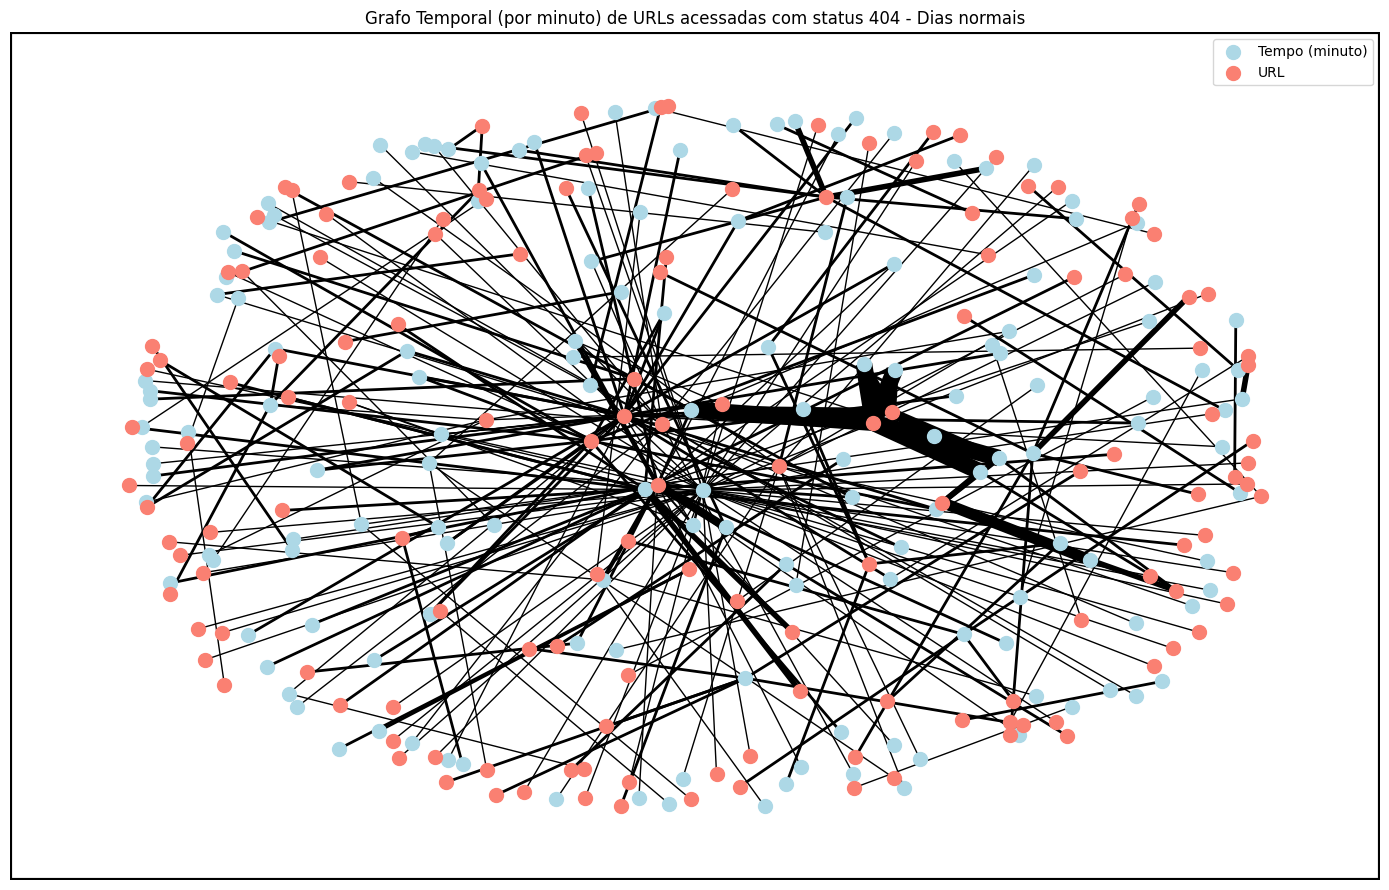

In [ ]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.patches import Rectangle

def carregar_logs_para_df(caminho_arquivo):
    log_pattern = re.compile(
        r'(?P<ip>\d+\.\d+\.\d+\.\d+) - - \[(?P<datetime>[^\]]+)] '
        r'"(?P<method>\w+)\s(?P<url>\S+)\sHTTP/\d\.\d" (?P<status>\d{3}) (?P<size>\d+|-) '
        r'"(?P<referrer>.*?)" "(?P<user_agent>.*?)"'
    )
    entries = []
    with open(caminho_arquivo, 'r', encoding='utf-8', errors='ignore') as file:
        for line in file:
            match = log_pattern.match(line)
            if match:
                data = match.groupdict()
                try:
                    data['datetime'] = datetime.strptime(data['datetime'], "%d/%b/%Y:%H:%M:%S %z")
                    data['status'] = int(data['status'])
                    entries.append(data)
                except Exception:
                    continue
    return pd.DataFrame(entries)

def grafo_temporal_status_404(df):
    df_404 = df[df['status'] == 404].copy()
    df_404['timestamp_min'] = df_404['datetime'].dt.floor('min')

    G = nx.Graph()
    for _, row in df_404.iterrows():
        tempo = row['timestamp_min'].strftime('%Y-%m-%d %H:%M')
        url = row['url']
        if G.has_edge(tempo, url):
            G[tempo][url]['weight'] += 1
        else:
            G.add_node(tempo, type='tempo')
            G.add_node(url, type='url')
            G.add_edge(tempo, url, weight=1)

    return G

def desenhar_grafo_temporal(G):
    edge_weights = nx.get_edge_attributes(G, 'weight')
    pos = nx.spring_layout(G, seed=42, k=0.6)

    plt.figure(figsize=(14, 9))
    nx.draw_networkx_nodes(G, pos,
                           nodelist=[n for n, d in G.nodes(data=True) if d['type'] == 'tempo'],
                           node_color='lightblue', node_size=100, label='Tempo (minuto)')
    nx.draw_networkx_nodes(G, pos,
                           nodelist=[n for n, d in G.nodes(data=True) if d['type'] == 'url'],
                           node_color='salmon', node_size=100, label='URL')

    # Apenas rótulos de tempo
    #tempo_labels = {n: n for n, d in G.nodes(data=True) if d['type'] == 'tempo'}
    #nx.draw_networkx_labels(G, pos, labels=tempo_labels, font_size=8)

    # Dentro da função, logo após plt.gca():
    ax = plt.gca()
    # Rectangle: (x, y), largura, altura
    border = Rectangle(
        (0,0),1,1, transform=ax.transAxes,
        facecolor='none',
        edgecolor='black',
        linewidth=3,
        zorder=10
    )
    ax.add_patch(border)

    nx.draw_networkx_edges(G, pos, width=[edge_weights[e] for e in G.edges()])
    plt.title("Grafo Temporal (por minuto) de URLs acessadas com status 404 - Dias normais")
    plt.axis('off')
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    caminho_log = "log3-junho-a3"
    df = carregar_logs_para_df(caminho_log)
    G = grafo_temporal_status_404(df)
    desenhar_grafo_temporal(G)

In [2]:
def relatorio_metrico(B):
    num_nos = B.number_of_nodes()
    num_arestas = B.number_of_edges()
    componentes = nx.number_connected_components(B)
    graus = [grau for _, grau in B.degree()]
    grau_medio = sum(graus) / len(graus)

    print(f"Número de nós: {num_nos}")
    print(f"Número de arestas: {num_arestas}")
    print(f"Número de componentes conectados: {componentes}")
    print(f"Grau médio: {grau_medio:.2f}")
    
print("Grafo dias normais")
relatorio_metrico(G)

Grafo dias normais
Número de nós: 291
Número de arestas: 266
Número de componentes conectados: 43
Grau médio: 1.83


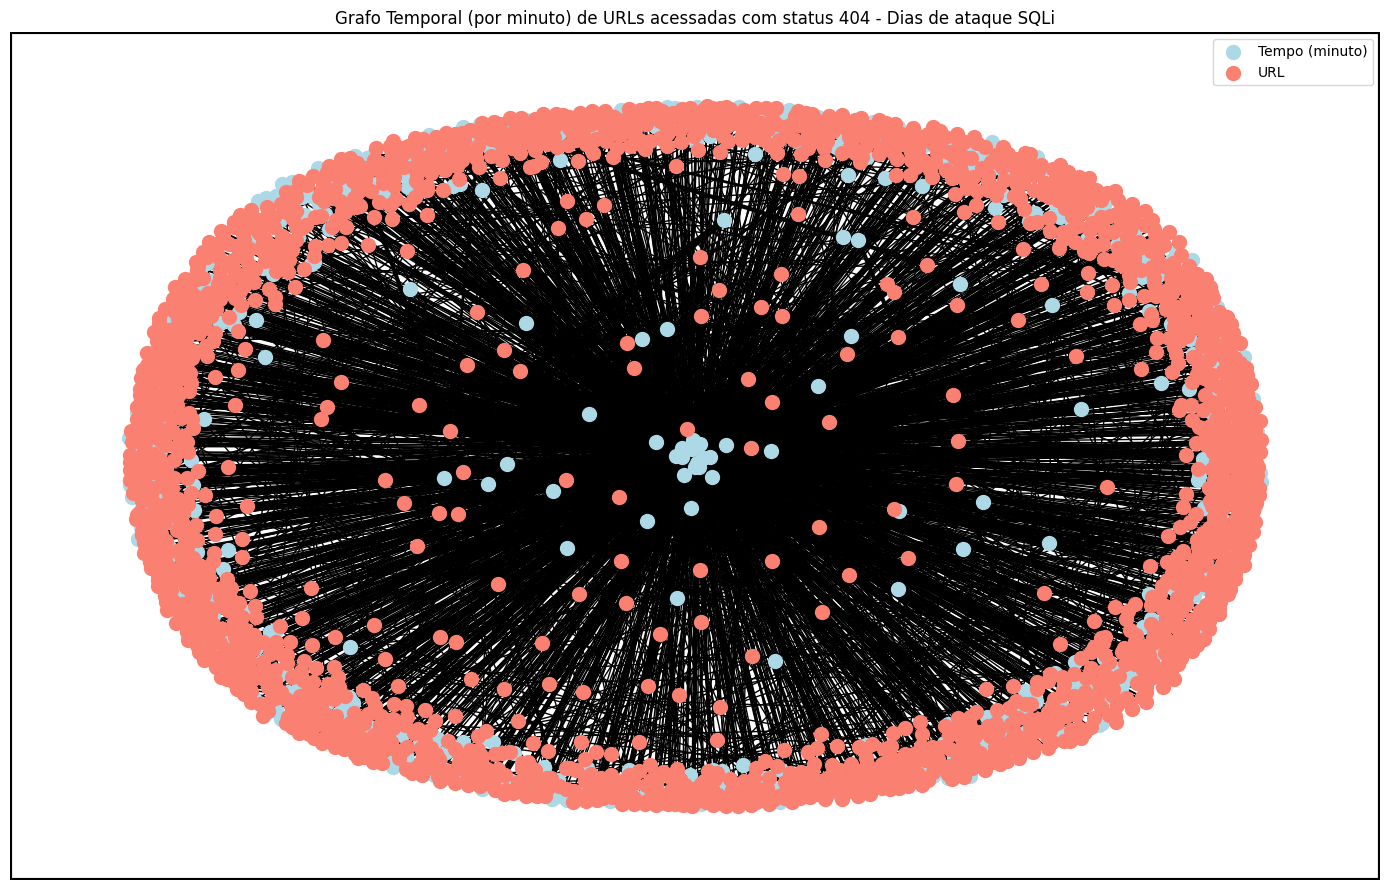

In [3]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.patches import Rectangle

def carregar_logs_para_df(caminho_arquivo):
    log_pattern = re.compile(
        r'(?P<ip>\d+\.\d+\.\d+\.\d+) - - \[(?P<datetime>[^\]]+)] '
        r'"(?P<method>\w+)\s(?P<url>\S+)\sHTTP/\d\.\d" (?P<status>\d{3}) (?P<size>\d+|-) '
        r'"(?P<referrer>.*?)" "(?P<user_agent>.*?)"'
    )
    entries = []
    with open(caminho_arquivo, 'r', encoding='utf-8', errors='ignore') as file:
        for line in file:
            match = log_pattern.match(line)
            if match:
                data = match.groupdict()
                try:
                    data['datetime'] = datetime.strptime(data['datetime'], "%d/%b/%Y:%H:%M:%S %z")
                    data['status'] = int(data['status'])
                    entries.append(data)
                except Exception:
                    continue
    return pd.DataFrame(entries)

def grafo_temporal_status_404(df):
    df_404 = df[df['status'] == 404].copy()
    df_404['timestamp_min'] = df_404['datetime'].dt.floor('min')

    G = nx.Graph()
    for _, row in df_404.iterrows():
        tempo = row['timestamp_min'].strftime('%Y-%m-%d %H:%M')
        url = row['url']
        if G.has_edge(tempo, url):
            G[tempo][url]['weight'] += 1
        else:
            G.add_node(tempo, type='tempo')
            G.add_node(url, type='url')
            G.add_edge(tempo, url, weight=1)

    return G

def desenhar_grafo_temporal(G):
    edge_weights = nx.get_edge_attributes(G, 'weight')
    pos = nx.spring_layout(G, seed=42, k=0.6)

    plt.figure(figsize=(14, 9))
    nx.draw_networkx_nodes(G, pos,
                           nodelist=[n for n, d in G.nodes(data=True) if d['type'] == 'tempo'],
                           node_color='lightblue', node_size=100, label='Tempo (minuto)')
    nx.draw_networkx_nodes(G, pos,
                           nodelist=[n for n, d in G.nodes(data=True) if d['type'] == 'url'],
                           node_color='salmon', node_size=100, label='URL')

    # Apenas rótulos de tempo
    #tempo_labels = {n: n for n, d in G.nodes(data=True) if d['type'] == 'tempo'}
    #nx.draw_networkx_labels(G, pos, labels=tempo_labels, font_size=8)

    # Dentro da função, logo após plt.gca():
    ax = plt.gca()
    # Rectangle: (x, y), largura, altura
    border = Rectangle(
        (0,0),1,1, transform=ax.transAxes,
        facecolor='none',
        edgecolor='black',
        linewidth=3,
        zorder=10
    )
    ax.add_patch(border)

    nx.draw_networkx_edges(G, pos, width=[edge_weights[e] for e in G.edges()])
    plt.title("Grafo Temporal (por minuto) de URLs acessadas com status 404 - Dias de ataque SQLi")
    plt.axis('off')
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    caminho_log = "logs-invasao.log"  # Substitua com o caminho real do seu arquivo
    df = carregar_logs_para_df(caminho_log)
    G = grafo_temporal_status_404(df)
    desenhar_grafo_temporal(G)

In [4]:
print("Grafo dias ataque")
relatorio_metrico(G)

Grafo dias ataque
Número de nós: 2391
Número de arestas: 3362
Número de componentes conectados: 209
Grau médio: 2.81


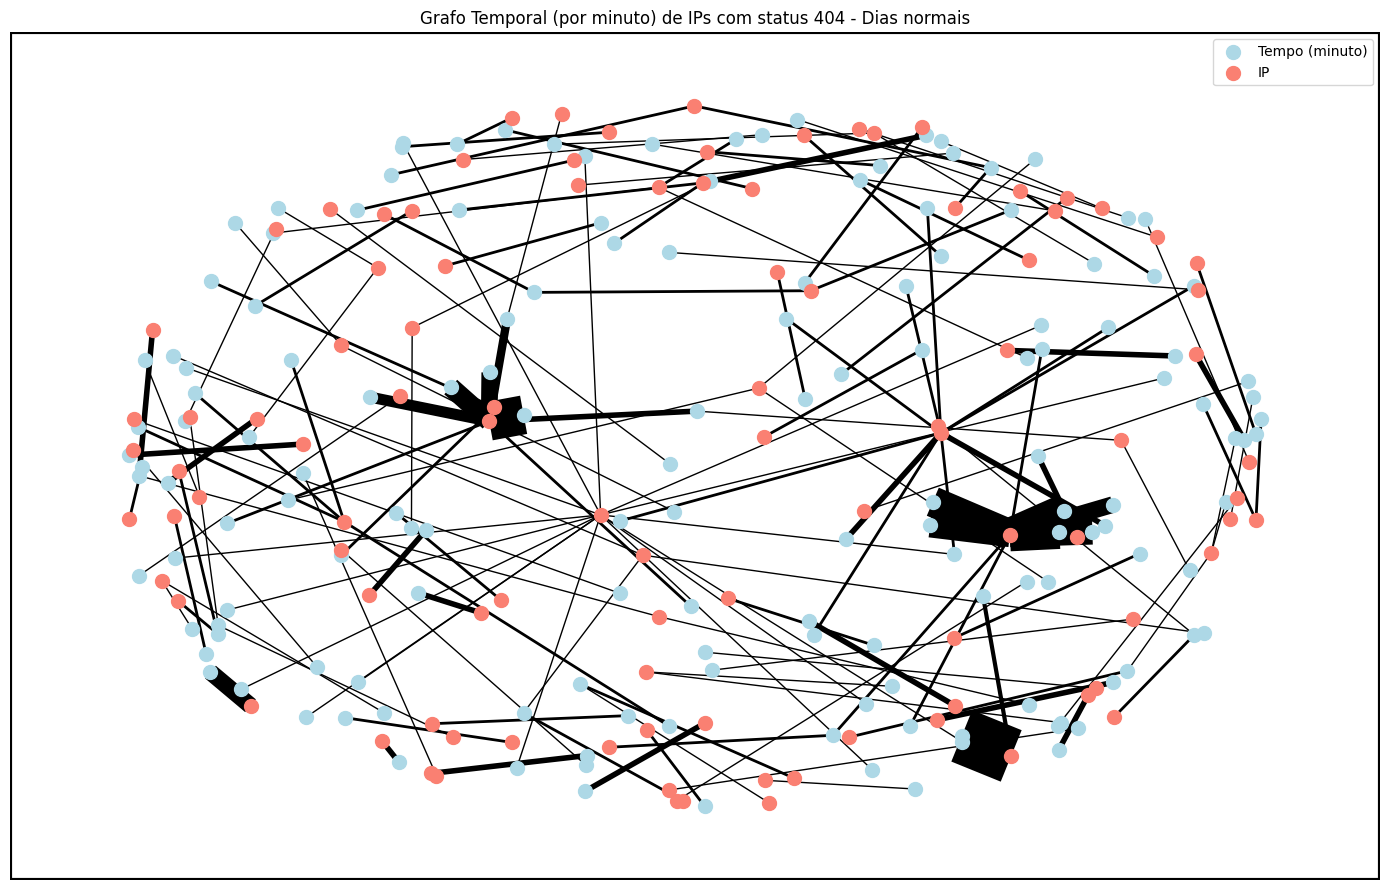

In [1]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.patches import Rectangle

def carregar_logs_para_df(caminho_arquivo):
    log_pattern = re.compile(
        r'(?P<ip>\d+\.\d+\.\d+\.\d+) - - \[(?P<datetime>[^\]]+)] '
        r'"(?P<method>\w+)\s(?P<url>\S+)\sHTTP/\d\.\d" (?P<status>\d{3}) (?P<size>\d+|-) '
        r'"(?P<referrer>.*?)" "(?P<user_agent>.*?)"'
    )
    entries = []
    with open(caminho_arquivo, 'r', encoding='utf-8', errors='ignore') as file:
        for line in file:
            match = log_pattern.match(line)
            if match:
                data = match.groupdict()
                try:
                    data['datetime'] = datetime.strptime(data['datetime'], "%d/%b/%Y:%H:%M:%S %z")
                    data['status'] = int(data['status'])
                    entries.append(data)
                except Exception:
                    continue
    return pd.DataFrame(entries)

def grafo_temporal_status_404(df):
    df_404 = df[df['status'] == 404].copy()
    df_404['timestamp_min'] = df_404['datetime'].dt.floor('min')

    G = nx.Graph()
    for _, row in df_404.iterrows():
        tempo = row['timestamp_min'].strftime('%Y-%m-%d %H:%M')
        ip = row['ip']
        if G.has_edge(tempo, ip):
            G[tempo][ip]['weight'] += 1
        else:
            G.add_node(tempo, type='tempo')
            G.add_node(ip, type='ip')
            G.add_edge(tempo, ip, weight=1)

    return G

def desenhar_grafo_temporal(G):
    edge_weights = nx.get_edge_attributes(G, 'weight')
    pos = nx.spring_layout(G, seed=42, k=0.5)

    plt.figure(figsize=(14, 9))
    nx.draw_networkx_nodes(G, pos,
                           nodelist=[n for n, d in G.nodes(data=True) if d['type'] == 'tempo'],
                           node_color='lightblue', node_size=100, label='Tempo (minuto)')
    nx.draw_networkx_nodes(G, pos,
                           nodelist=[n for n, d in G.nodes(data=True) if d['type'] == 'ip'],
                           node_color='salmon', node_size=100, label='IP')

    # Dentro da função, logo após plt.gca():
    ax = plt.gca()
    # Rectangle: (x, y), largura, altura
    border = Rectangle(
        (0,0),1,1, transform=ax.transAxes,
        facecolor='none',
        edgecolor='black',
        linewidth=3,
        zorder=10
    )
    ax.add_patch(border)

    nx.draw_networkx_edges(G, pos, width=[edge_weights[e] for e in G.edges()])
    plt.title("Grafo Temporal (por minuto) de IPs com status 404 - Dias normais")
    plt.axis('off')
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    caminho_log = "log3-junho-a3"  # Substitua com o caminho real do seu arquivo
    df = carregar_logs_para_df(caminho_log)
    G = grafo_temporal_status_404(df)
    desenhar_grafo_temporal(G)

In [7]:
print("Grafo dias normais")
relatorio_metrico(G)

Grafo dias normais
Número de nós: 2595
Número de arestas: 4040
Número de componentes conectados: 63
Grau médio: 3.11


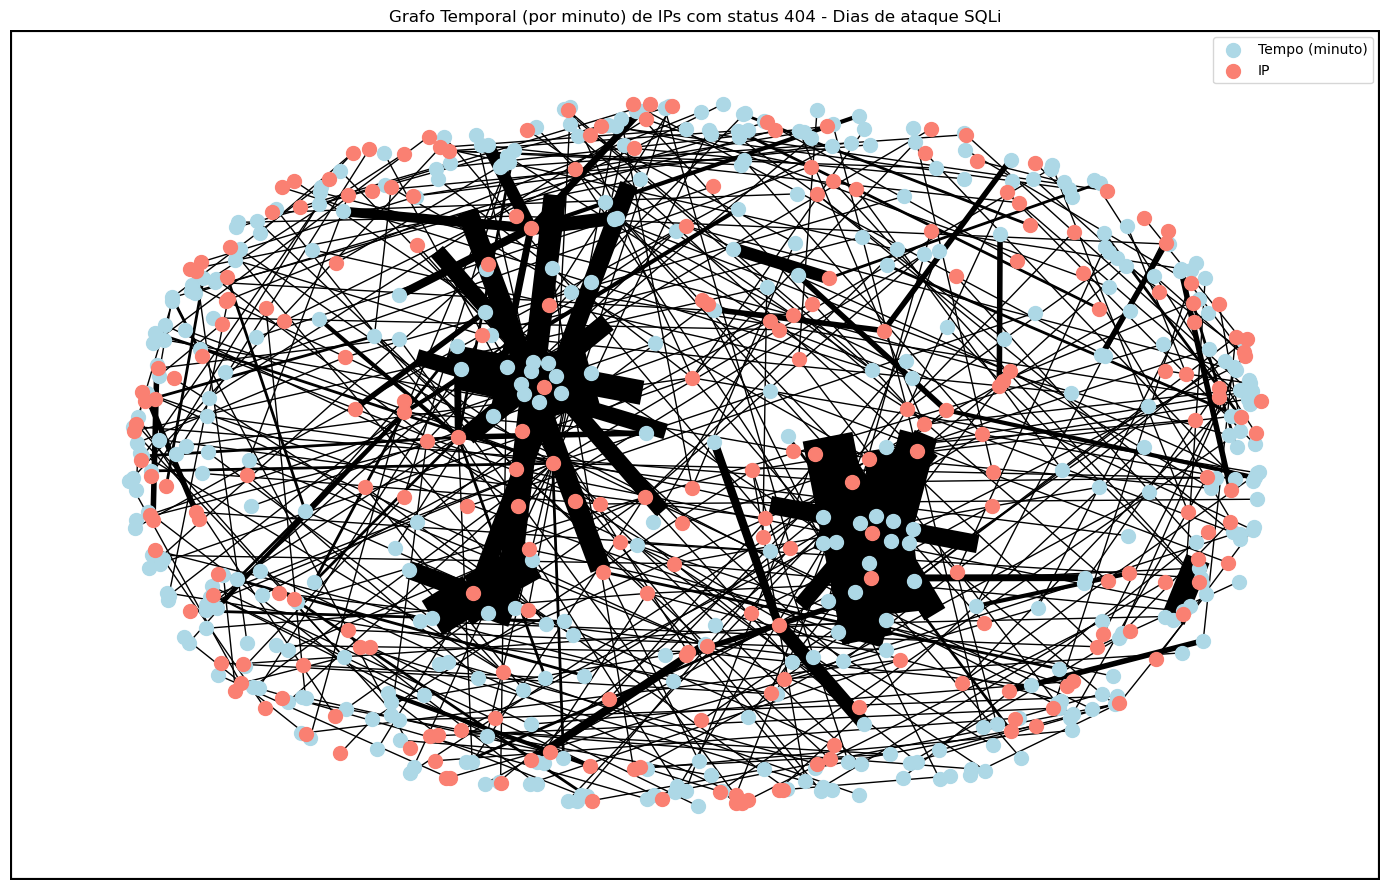

In [8]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.patches import Rectangle

def carregar_logs_para_df(caminho_arquivo):
    log_pattern = re.compile(
        r'(?P<ip>\d+\.\d+\.\d+\.\d+) - - \[(?P<datetime>[^\]]+)] '
        r'"(?P<method>\w+)\s(?P<url>\S+)\sHTTP/\d\.\d" (?P<status>\d{3}) (?P<size>\d+|-) '
        r'"(?P<referrer>.*?)" "(?P<user_agent>.*?)"'
    )
    entries = []
    with open(caminho_arquivo, 'r', encoding='utf-8', errors='ignore') as file:
        for line in file:
            match = log_pattern.match(line)
            if match:
                data = match.groupdict()
                try:
                    data['datetime'] = datetime.strptime(data['datetime'], "%d/%b/%Y:%H:%M:%S %z")
                    data['status'] = int(data['status'])
                    entries.append(data)
                except Exception:
                    continue
    return pd.DataFrame(entries)

def grafo_temporal_status_404(df):
    df_404 = df[df['status'] == 404].copy()
    df_404['timestamp_min'] = df_404['datetime'].dt.floor('min')

    G = nx.Graph()
    for _, row in df_404.iterrows():
        tempo = row['timestamp_min'].strftime('%Y-%m-%d %H:%M')
        ip = row['ip']
        if G.has_edge(tempo, ip):
            G[tempo][ip]['weight'] += 1
        else:
            G.add_node(tempo, type='tempo')
            G.add_node(ip, type='ip')
            G.add_edge(tempo, ip, weight=1)

    return G

def desenhar_grafo_temporal(G):
    edge_weights = nx.get_edge_attributes(G, 'weight')
    pos = nx.spring_layout(G, seed=42, k=0.5)

    plt.figure(figsize=(14, 9))
    nx.draw_networkx_nodes(G, pos,
                           nodelist=[n for n, d in G.nodes(data=True) if d['type'] == 'tempo'],
                           node_color='lightblue', node_size=100, label='Tempo (minuto)')
    nx.draw_networkx_nodes(G, pos,
                           nodelist=[n for n, d in G.nodes(data=True) if d['type'] == 'ip'],
                           node_color='salmon', node_size=100, label='IP')

    # Dentro da função, logo após plt.gca():
    ax = plt.gca()
    # Rectangle: (x, y), largura, altura
    border = Rectangle(
        (0,0),1,1, transform=ax.transAxes,
        facecolor='none',
        edgecolor='black',
        linewidth=3,
        zorder=10
    )
    ax.add_patch(border)

    nx.draw_networkx_edges(G, pos, width=[edge_weights[e] for e in G.edges()])
    plt.title("Grafo Temporal (por minuto) de IPs com status 404 - Dias de ataque SQLi")
    plt.axis('off')
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    caminho_log = "logs-invasao.log"  # Substitua com o caminho real do seu arquivo
    df = carregar_logs_para_df(caminho_log)
    G = grafo_temporal_status_404(df)
    desenhar_grafo_temporal(G)

In [8]:
print("Grafo dias ataque")
relatorio_metrico(G)

Grafo dias ataque
Número de nós: 649
Número de arestas: 458
Número de componentes conectados: 196
Grau médio: 1.41
